In [1]:
#Implementation of KNN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 

In [2]:
df = pd.read_csv ("census-income.data.csv", index_col = None)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [4]:
#Selecting features and splitting the datasets into features and label
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

x = df[selected_features] #feature
y = df.income #label

#Balancing the data
ros = RandomOverSampler()
ros.fit(x, y)

X, Y = ros.fit_resample(x, y)

In [5]:
#Splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=7)

In [6]:
#Source: https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
#implementing the KNN algorithm
#Assigning the nearest neighbor to 3 based on results below

model1 = KNeighborsClassifier(n_neighbors=3)

model1.fit(x_train, y_train)

#Predicitng the model in the test 
y_pred = model1.predict(x_test)

In [7]:
#To check the performance of the model

print(model1.score(x_test, y_test))

0.8266181229773463


In [8]:
#Deciding the k-value for the dataset. 
#Source: https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

neighbor = np.arange(1, 30)

tr_acc = np.empty(len(neighbor)) #train accuracy
te_acc = np.empty(len(neighbor)) #test accuracy

#now looping throught the k values
for i, k in enumerate(neighbor):
    model2 = KNeighborsClassifier(n_neighbors=k)
    model2.fit(x_train, y_train)

#Computing the model accuracy
    tr_acc[i] = model2.score(x_train, y_train)
    te_acc[i] = model2.score(x_test, y_test)

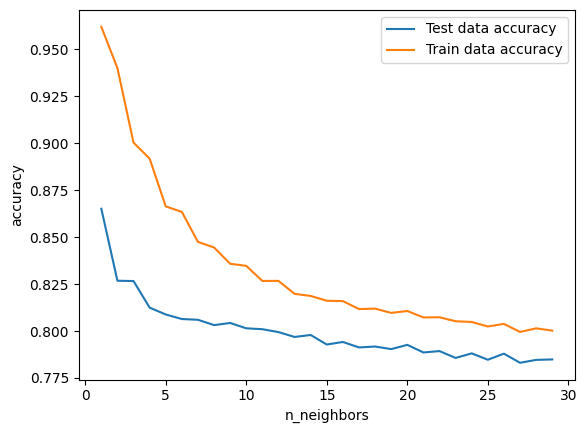

In [9]:
#Now plotting the data
plt.plot(neighbor, te_acc, label = "Test data accuracy")
plt.plot(neighbor, tr_acc, label = "Train data accuracy")

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()


In [10]:
##Should probably take 15 as the nearest neighbor. 

In [11]:
#now checking from the test data
test = pd.read_csv ("census-income.test.csv", index_col = None)
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [12]:
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

#from the real test data
x_test_real = test[selected_features]
y_test_real = test.income

#Source: https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
#implementing the KNN algorithm

#Predicitng the model in the test 
y_pred_real = model1.predict(x_test_real)
print(y_pred_real)


[0 0 1 ... 1 0 1]


In [13]:
#To check the performance of the model

print(model1.score(x_test_real, y_test_real))

0.7386454183266933


In [14]:
#Exporting prediction results to csv
prediction = pd.DataFrame(y_pred_real, columns=['KNN_predictions'])

prediction.to_csv('KNNPredictionTest.csv', index= False)

In [15]:
len(prediction)

15060

In [16]:
!jupyter nbconvert --to script *.ipynb

[NbConvertApp] Converting notebook KNN classification.ipynb to script
[NbConvertApp] Writing 3200 bytes to KNN classification.py
